# **Program Machine Learning Tugas Pengolahan Sinyal Digital**

**Prediksi Diabetes pada seseorang dengan Algoritma Machine Learning Menggunakan User Interface Berbasis Website**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
df.shape

(2000, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

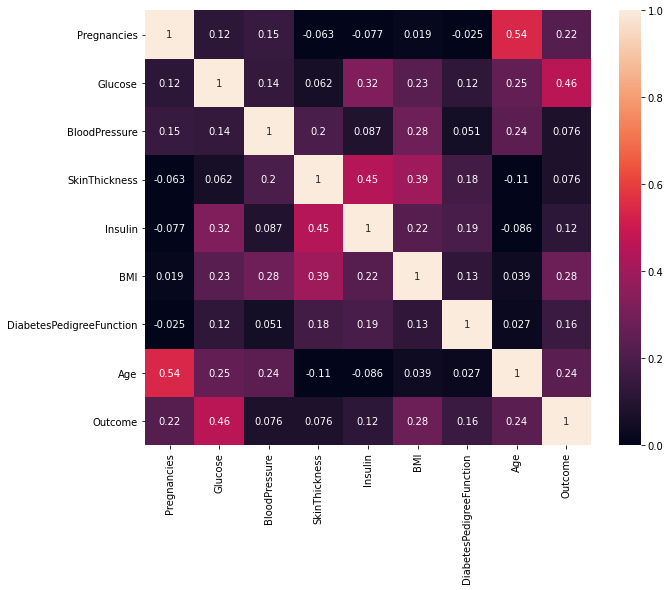

In [8]:
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,vmin=0,vmax=1)

Fitur terpenting yang bergantung pada hasil adalah Glukosa, Bmi, Usia, dan kehamilan

<AxesSubplot:xlabel='Outcome', ylabel='count'>

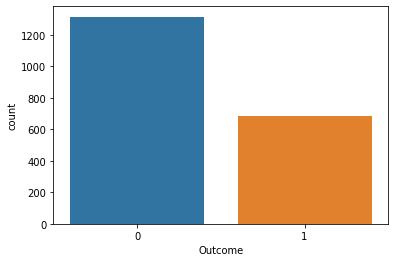

In [9]:
# Cek data outcome balance atau nggak ya ??
sns.countplot(x=df.Outcome)

In [10]:
df.Outcome.value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

Though we don't have any null values,Some of the entries in columns such as Glucose,B.P,Insulin has 0 value,which indicates
that these vlaues are to be replaced by NAN.

In [11]:
#Replacing 0 with NAN value
def replacing_0_with_NAN():
    for i in range(1,8):
        df.iloc[:,i]=np.where(df.iloc[:,i]==0,np.nan,df.iloc[:,i])      

replacing_0_with_NAN()  

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   1987 non-null   float64
 2   BloodPressure             1910 non-null   float64
 3   SkinThickness             1427 non-null   float64
 4   Insulin                   1044 non-null   float64
 5   BMI                       1972 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   float64
 8   Outcome                   2000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 140.8 KB


In [13]:
df.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

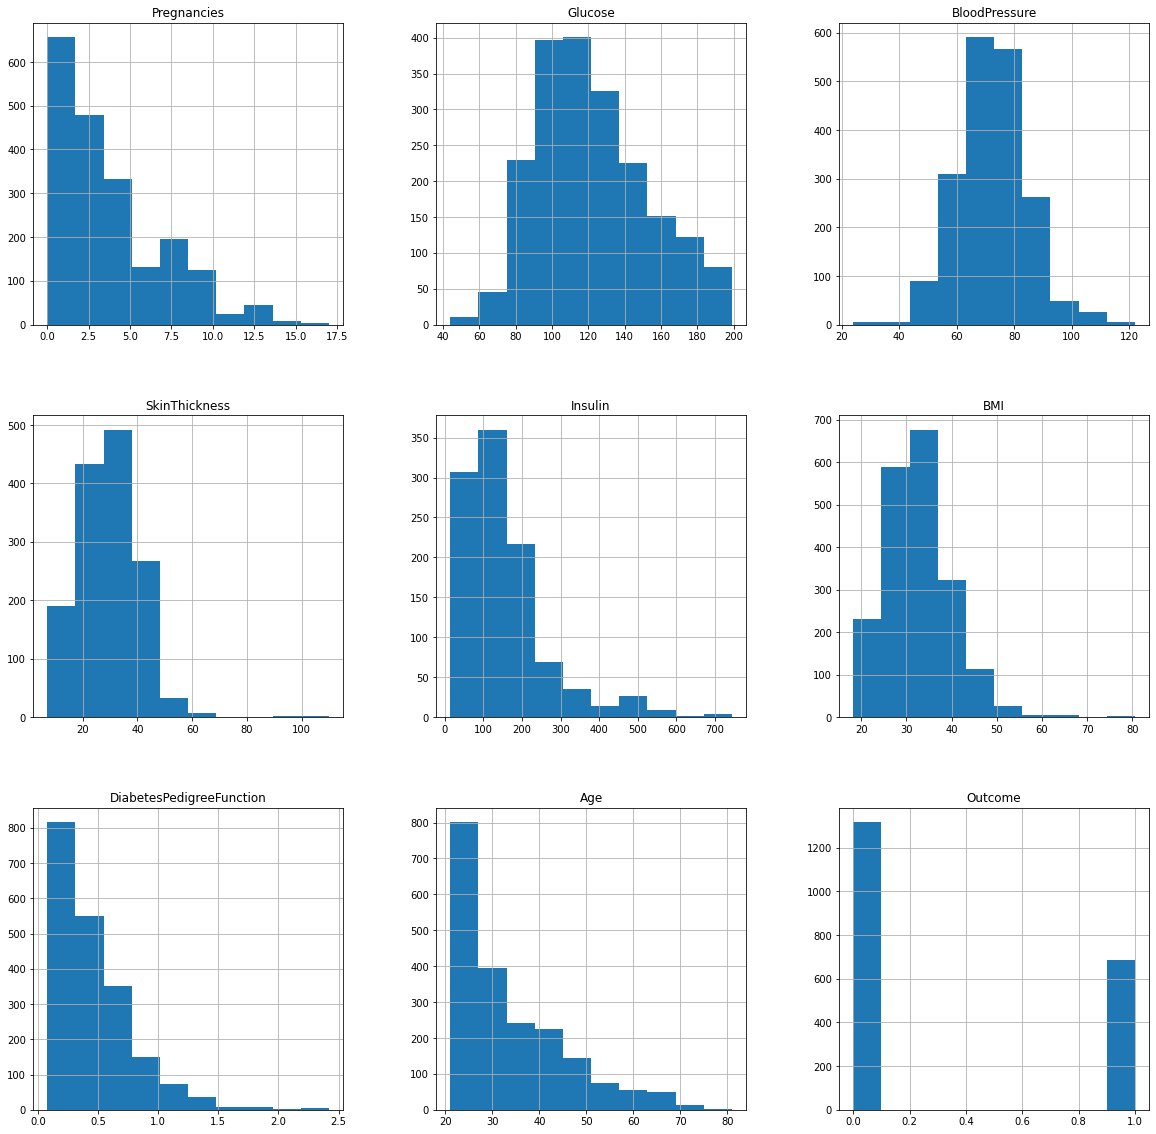

In [14]:
df.hist(figsize=(20,20))

## Penanganan Missing Values

In [15]:
df.Glucose.fillna(df.Glucose.mean(),inplace=True)
df.BloodPressure.fillna(df.BloodPressure.mean(),inplace=True)
df.SkinThickness.fillna(df.SkinThickness.median(),inplace=True)
df.Insulin.fillna(df.Insulin.mean(),inplace=True)
df.BMI.fillna(df.BMI.median(),inplace=True)

In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Statistik Pasien Diabetes

In [17]:
positive=df[df.Outcome==1]
positive.describe().T.drop('Outcome')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,684.0,4.732456,3.746358,0.000,1.000000,4.000000,7.000,17.00
Glucose,684.0,142.638673,29.188234,80.000,120.000000,140.000000,167.000,199.00
BloodPressure,684.0,75.294946,11.713040,30.000,68.000000,74.000000,82.000,114.00
SkinThickness,684.0,31.833333,8.691980,7.000,29.000000,29.000000,36.000,99.00
Insulin,684.0,176.893163,87.283575,14.000,153.743295,153.743295,167.000,600.00
BMI,684.0,35.462573,6.770795,20.100,30.900000,34.300000,38.700,67.10
DiabetesPedigreeFunction,684.0,0.540681,0.363689,0.088,0.261000,0.434000,0.727,2.42
Age,684.0,36.956140,10.924115,21.000,28.000000,36.000000,44.000,70.00


## Statistik Orang sehat

In [18]:
negative=df[df.Outcome==0]
negative.describe().T.drop('Outcome')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1316.0,3.168693,2.913526,0.000,1.00000,2.000000,5.000000,13.000
Glucose,1316.0,111.235431,25.242267,44.000,94.00000,107.000000,126.000000,197.000
BloodPressure,1316.0,70.900902,11.798226,24.000,62.00000,72.000000,78.000000,122.000
SkinThickness,1316.0,27.897416,9.057197,7.000,22.00000,29.000000,31.000000,110.000
Insulin,1316.0,141.710993,73.757213,15.000,95.00000,153.743295,153.743295,744.000
BMI,1316.0,31.182979,6.964979,18.200,25.90000,30.600000,35.400000,80.600
DiabetesPedigreeFunction,1316.0,0.434676,0.294268,0.078,0.23475,0.342000,0.571000,2.329
Age,1316.0,31.081307,11.721103,21.000,23.00000,26.000000,36.250000,81.000


## Perbandingan data antara Orang Sehat dengan Orang Diabetes

In [19]:
comparision=positive.describe().T[['mean']].drop('Outcome')
comparision.columns=['Mean Value (Diabetic Patients)']
comparision['Mean Value (Healthy Patients)']=negative.describe().T['mean']
comparision

,Mean Value (Diabetic Patients),Mean Value (Healthy Patients)
Pregnancies,4.732456,3.168693
Glucose,142.638673,111.235431
BloodPressure,75.294946,70.900902
SkinThickness,31.833333,27.897416
Insulin,176.893163,141.710993
BMI,35.462573,31.182979
DiabetesPedigreeFunction,0.540681,0.434676
Age,36.956140,31.081307


<Figure size 720x720 with 0 Axes>

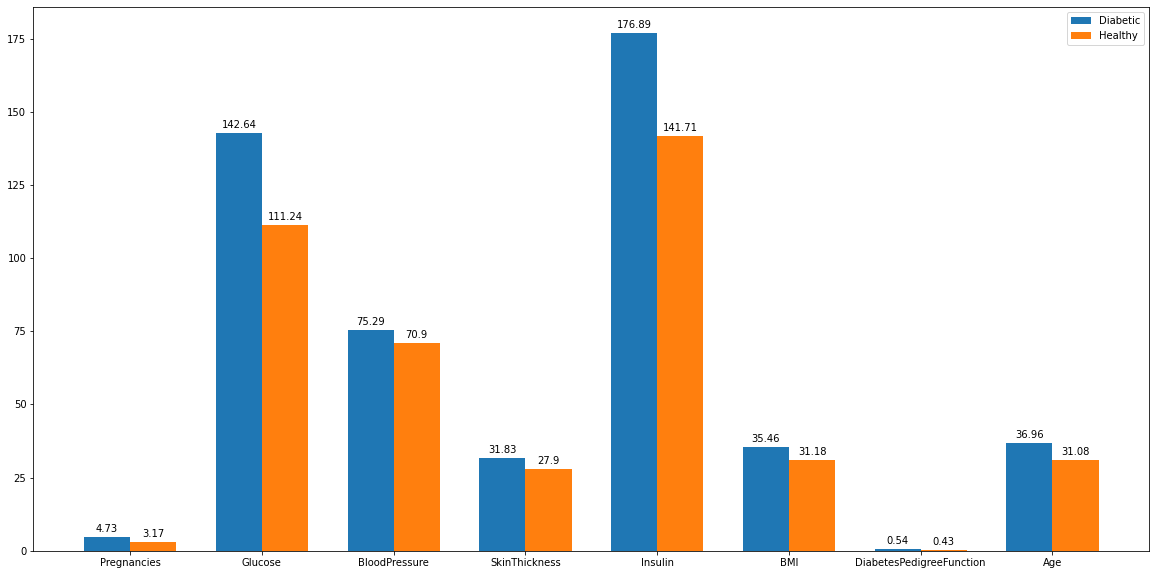

In [20]:
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,10)
a=np.arange(len(comparision.index))
width=0.35
fig, ax = plt.subplots()
rects1 = ax.bar(a - width/2, comparision['Mean Value (Diabetic Patients)'], width, label='Diabetic')
rects2 = ax.bar(a + width/2, comparision['Mean Value (Healthy Patients)'], width, label='Healthy')
ax.set_xticks(a)
ax.set_xticklabels(comparision.index)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10)

Insulin level of Diabetic patient is higher than that of Healthy person by considerable amount.
BMI Also differs by significant value.
Glucose level of Diabetic Patient is much greater than that of Healthy person.
However,there is not as such any deviation in age group.

## Bangun dan Tuning Model Awal 

In [21]:
X=df.iloc[:,:-1].values
y=df.iloc[:,8].values

In [22]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
Counter(y_train)
Counter(y_test)

Counter({0: 252, 1: 148})

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold,cross_val_score

In [25]:
model_dictionary={
    
    'Logistic_regrssion':{
        'model':LogisticRegression(multi_class='auto'),
        'params':{
            'penalty' : ['l1', 'l2'],
            'C' : np.logspace(-4, 4, 20),
            'solver' : ['liblinear']
            
        }
    },
    
    'svm':{
        'model':SVC(),
        'params':{
            'C':[2,5,10,20,50],
            'kernel':['linear','rbf'],
            'gamma':[0.1,0.01,0.001]
        }
    },
    
    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[2,5,7,10,15,20]
        }
    },
    
    'Random_Forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10,20,50,100,150,200],
            'criterion':['gini','entropy'],
            'max_depth':[1,2,3,4,5], 
            'min_samples_leaf':[1,2,3,4,5], 
            'min_samples_split':[2,3,4,5]
            
            
        }
    },
    
    'XGBoost':{
        'model':XGBClassifier(),
        'params':{
             "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
             "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
             "min_child_weight" : [ 1, 3, 5, 7 ],
             "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
             "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
        }
    },
    
    'Desision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'max_depth':[1,2,5,7,10], 
            'criterion' : ['gini','entropy'],
            'min_samples_leaf':[1,2,3,4,5], 
            'min_samples_split':[2,3,4,5]
        }
    }
     
}

In [26]:
performance=[]
for model_name,mp in model_dictionary.items():
    rs=RandomizedSearchCV(mp['model'],mp['params'],n_iter=15,cv=StratifiedKFold(n_splits=5))
    rs.fit(X_train,y_train)
    
    performance.append({
        'model':model_name,
        'best_score':rs.best_score_,
        'best_params':rs.best_params_
    })
    
df3 = pd.DataFrame(performance,columns=['model','best_score','best_params'])
df3

[16:30:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:30:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:30:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:30:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,model,best_score,best_params
0,Logistic_regrssion,0.779375,"{'solver': 'liblinear', 'penalty': 'l1', 'C': ..."
1,svm,0.858125,"{'kernel': 'rbf', 'gamma': 0.1, 'C': 50}"
2,knn,0.869375,{'n_neighbors': 2}
3,Random_Forest,0.815625,"{'n_estimators': 100, 'min_samples_split': 2, ..."
4,XGBoost,0.945000,"{'min_child_weight': 1, 'max_depth': 8, 'learn..."
5,Desision_tree,0.860625,"{'min_samples_split': 4, 'min_samples_leaf': 3..."


## XGBoost punya akurasi tertinggi

In [27]:
xgboost_classifier=XGBClassifier(min_child_weight=1,max_depth=15,learning_rate=0.1,gamma= 0.2,colsample_bytree=0.5)
xgb = xgboost_classifier.fit(X_train,y_train)
xgboost_classifier.score(X_test,y_test)

# import pickle
# filename = 'model.pkl'
# pickle.dump(xgb, open(filename, 'wb'))


[16:30:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9825

## Evaluasi Model

In [28]:
print(classification_report(y_test,xgboost_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       252
           1       0.99      0.97      0.98       148

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

